In [ ]:
!pip install darts

     |████████████████████████████████| 253 kB 13.2 MB/s 
     |████████████████████████████████| 9.9 MB 76.3 MB/s 
     |████████████████████████████████| 788 kB 77.1 MB/s 
     |████████████████████████████████| 1.4 MB 52.0 MB/s 
     |████████████████████████████████| 28.5 MB 51 kB/s 
     |████████████████████████████████| 10.3 MB 43.6 MB/s 
     |████████████████████████████████| 804.1 MB 3.1 kB/s 
     |████████████████████████████████| 142 kB 75.9 MB/s 
     |████████████████████████████████| 9.5 MB 60.9 MB/s 
     |████████████████████████████████| 2.0 MB 58.2 MB/s 
     |████████████████████████████████| 177 kB 75.7 MB/s 
     |████████████████████████████████| 65 kB 3.8 MB/s 
     |████████████████████████████████| 22.3 MB 122.2 MB/s 
     |████████████████████████████████| 62 kB 696 kB/s 
     |████████████████████████████████| 370 kB 65.1 MB/s 
     |████████████████████████████████| 49 kB 4.6 MB/s 
     |████████████████████████████████| 214 kB 72.2 MB/s 
  Created wheel f

In [ ]:
from darts.datasets import AirPassengersDataset , MonthlyMilkDataset

In [ ]:
AirPassengersDataset().load().pd_dataframe()

component,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [ ]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Length: 144, dtype: float64

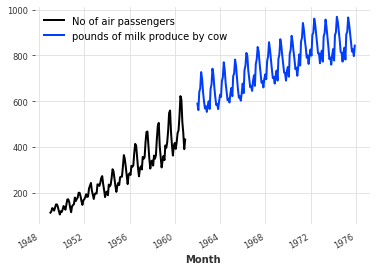

In [ ]:
import matplotlib.pyplot as plt
series_air = AirPassengersDataset().load()
series_milk = MonthlyMilkDataset().load()

series_air.plot(label = 'No of air passengers')
series_milk.plot(label = 'pounds of milk produce by cow')
plt.legend();

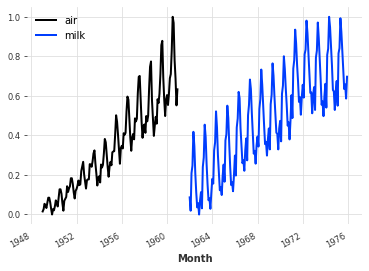

In [ ]:
from darts.dataprocessing.transformers import Scaler
scaler_air , scaler_milk = Scaler() , Scaler()
series_air_scaled = scaler_air.fit_transform(series_air)
series_milk_scaled = scaler_milk.fit_transform(series_milk)

series_air_scaled.plot(label = 'air')
series_milk_scaled.plot(label = 'milk')
plt.legend();

In [ ]:
# Train And Validation Split
train_air, val_air = series_air_scaled[:-36], series_air_scaled[-36:]
train_milk, val_milk = series_milk_scaled[:-36], series_milk_scaled[-36:]

In [ ]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [ ]:
model_air_milk = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

In [ ]:
model_air_milk.fit([train_air, train_milk], verbose=True)

[2021-09-26 06:22:09,422] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-09-26 06:22:09,422] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-09-26 06:22:09,570] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-09-26 06:22:09,570] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  1%|          | 1/100 [00:02<03:51,  2.33s/it]

 11%|█         | 11/100 [00:19<02:22,  1.61s/it]

 21%|██        | 21/100 [00:44<04:02,  3.07s/it]

 31%|███       | 31/100 [01:21<03:53,  3.39s/it]

 41%|████      | 41/100 [01:58<03:32,  3.60s/it]

 51%|█████     | 51/100 [02:33<02:57,  3.62s/it]

 61%|██████    | 61/100 [02:59<01:22,  2.12s/it]

 71%|███████   | 71/100 [03:14<00:43,  1.51s/it]

 81%|████████  | 81/100 [03:34<00:45,  2.40s/it]

 91%|█████████ | 91/100 [03:59<00:21,  2.41s/it]

100%|██████████| 100/100 [04:21<00:00,  2.61s/it]


MAPE = 5.51%


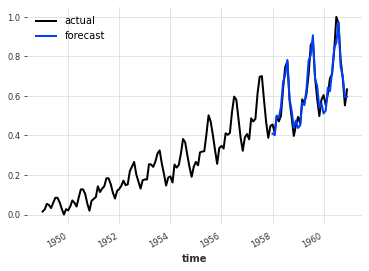

In [ ]:
pred = model_air_milk.predict(n=36, series=train_air)

series_air_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_air_scaled, pred)))

MAPE = 11.75%


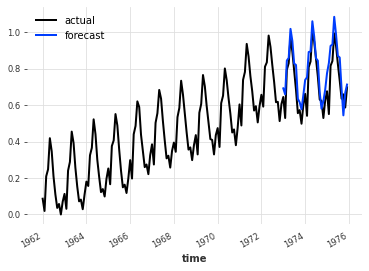

In [ ]:
pred = model_air_milk.predict(n=36, series=train_milk)

series_milk_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_milk_scaled, pred)))